# Forecasting Stocks from Yahoo Finance with Prophet

In [13]:
import yfinance as yf

pltr = yf.Ticker('PLTR')

# source all time historical data for the ticker
hist = pltr.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-30 00:00:00-04:00,10.000000,11.410000,9.110000,9.500000,338584400,0.0,0.0
2020-10-01 00:00:00-04:00,9.690000,10.100000,9.230000,9.460000,124297600,0.0,0.0
2020-10-02 00:00:00-04:00,9.060000,9.280000,8.940000,9.200000,55018300,0.0,0.0
2020-10-05 00:00:00-04:00,9.430000,9.490000,8.920000,9.030000,36316900,0.0,0.0
2020-10-06 00:00:00-04:00,9.040000,10.180000,8.900000,9.900000,90864000,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-12 00:00:00-04:00,17.920000,18.240000,17.551001,17.940001,57940900,0.0,0.0
2023-10-13 00:00:00-04:00,18.059999,18.160000,17.270000,17.360001,54541600,0.0,0.0
2023-10-16 00:00:00-04:00,17.209999,17.459999,16.670000,17.360001,44987300,0.0,0.0


In [14]:
import pandas as pd

df = pd.DataFrame()

# create a new dataframe that follows Prophet's ds, y column requirements
df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail(3)

,ds,y
765,2023-10-16 00:00:00-04:00,17.360001
766,2023-10-17 00:00:00-04:00,17.840000
767,2023-10-18 00:00:00-04:00,17.200001


In [15]:
# removing the timezone from the dates (ds) column
df['ds'] = df['ds'].dt.tz_localize(None)

df.tail(3)

,ds,y
765,2023-10-16,17.360001
766,2023-10-17,17.840000
767,2023-10-18,17.200001


In [32]:
from prophet import Prophet

# create a basic Prophet model which does not or does account for intraday trends
m = Prophet(daily_seasonality=True) # or False

# fit the model to the data
m.fit(df)

09:57:06 - cmdstanpy - INFO - Chain [1] start processing
09:57:07 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# define a future time period of N days
future = m.make_future_dataframe(69, freq='D')

# create a forecast for the defined future
forecast = m.predict(future)

# display key columns from the last 5 rows of the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
832,2023-12-22,20.726941,17.907293,23.649417
833,2023-12-23,20.906262,18.194956,23.642435
834,2023-12-24,20.825080,17.929329,23.887651
835,2023-12-25,20.544641,17.489321,23.267990
836,2023-12-26,20.434981,17.493510,23.339445


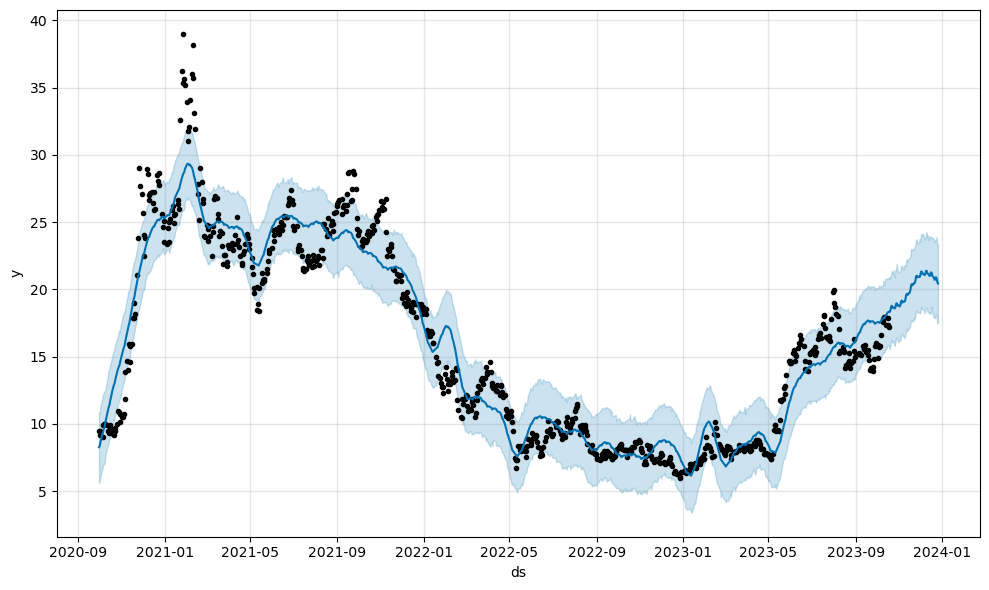

In [34]:
# visualize the forecast
m.plot(forecast);

function that allows us to predict the future performance of any stock for a given number of days. This function will require four inputs: ticker, periods, hist, and display_chart, as well as an optional input, return_forecast.

### These inputs are integral to the forecasting process

In [48]:
def make_forecast(
    ticker, periods, hist='max',
    return_forecast=False, display_chart=True
                  ):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    > return_forecast
        >> option to return forecast data table
            > default: False
            > options: False, True
    > return_chart
        >> option to return visual chart of forecast
            > default: True
            > options: False, True
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=True)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    # visualize the forecast if requested
    if display_chart:
      m.plot(forecast)
    else:
      pass

    # return the forecast data table if requested
    if return_forecast:
      return forecast
    else:
      pass

### Make some Forecasts with that Function

#### Predict a KKR real estate trust price

10:06:41 - cmdstanpy - INFO - Chain [1] start processing
10:06:41 - cmdstanpy - INFO - Chain [1] done processing


,Date,Predicted Price,Lower Bound Predicted,Upper Bound Predicted
1795,2024-04-06 04:00:00,6.701951,5.631710,7.752653
1796,2024-04-07 04:00:00,7.053083,5.885238,8.197730
1797,2024-04-08 04:00:00,7.282274,6.099087,8.351777
1798,2024-04-09 04:00:00,7.298327,6.155054,8.371129
1799,2024-04-10 04:00:00,7.309432,6.209570,8.376087
1800,2024-04-11 04:00:00,7.307382,6.224728,8.420755
1801,2024-04-12 04:00:00,7.328733,6.124431,8.466852
1802,2024-04-13 04:00:00,6.822480,5.724491,7.914991
1803,2024-04-14 04:00:00,7.136954,5.990920,8.216188
1804,2024-04-15 04:00:00,7.328370,6.175249,8.425011


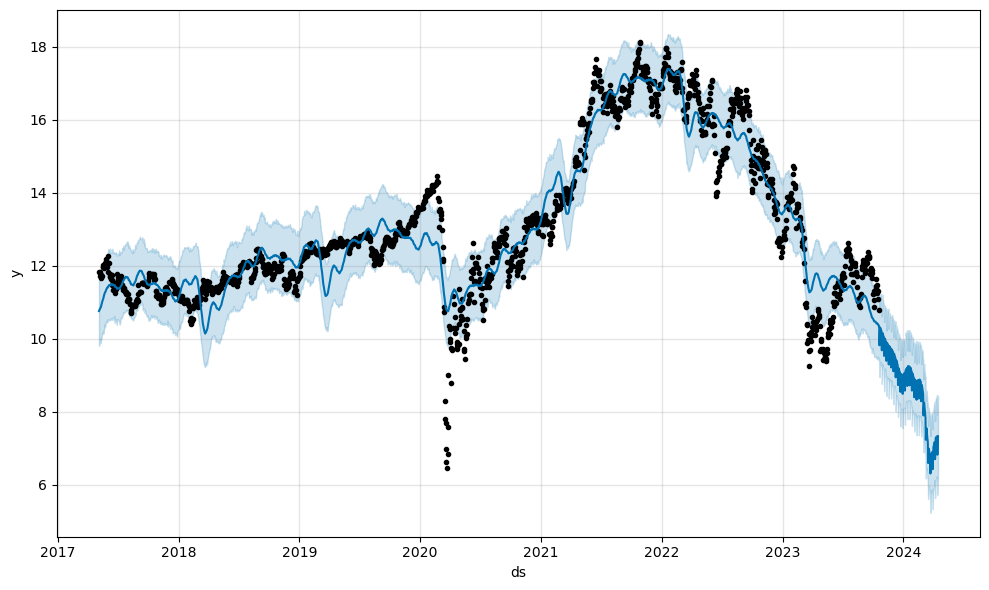

In [57]:
# forecast the kkr real estate finance trust for the next 180 days
# return the forecast table, do not visualize a chart
kkr_forecast = make_forecast('KREF', 180, return_forecast=True, display_chart=True)

# focus on the immedeately understandable columns of the forecast
kkr_forecast = kkr_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# convert those columns to layman's
kkr_forecast.columns = ['Date', 'Predicted Price', 'Lower Bound Predicted', 'Upper Bound Predicted']

# display the last 10 days of the table
kkr_forecast.tail(10)

#### Predict Bitcoin Price

10:07:25 - cmdstanpy - INFO - Chain [1] start processing
10:07:27 - cmdstanpy - INFO - Chain [1] done processing


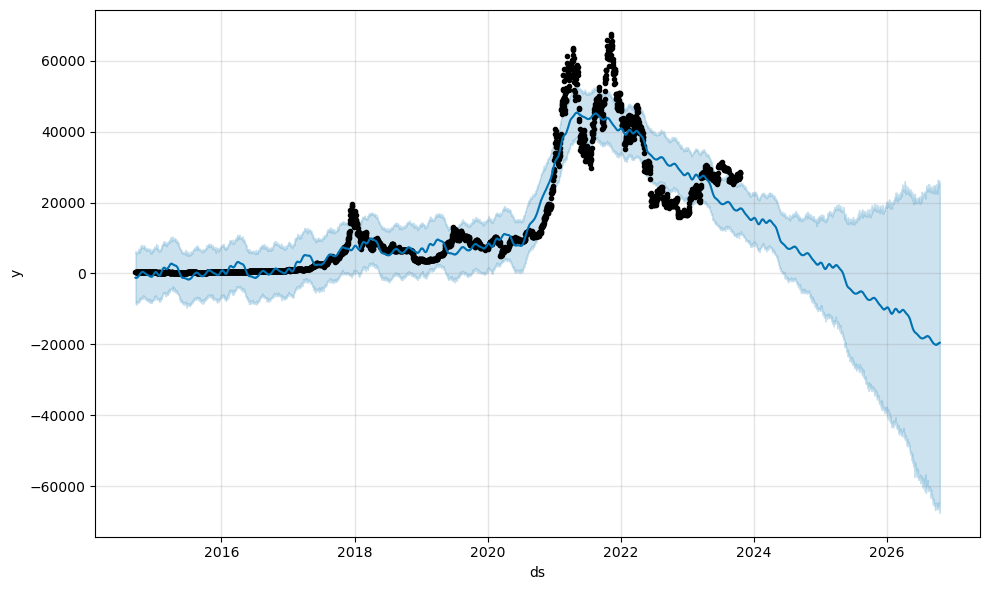

In [58]:
# set variable for number of years to predict
n_years = 3
n_days = n_years * 365

# forecast Bitcoin for that amount of time
btc_forecast = make_forecast('BTC-USD', n_days)

# display the forecasted price of Bitcoin
btc_forecast